1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
---

In [33]:
# Creating own dataset
import numpy as np
X = np.arange(-50, 300, 5)
X

array([-50, -45, -40, -35, -30, -25, -20, -15, -10,  -5,   0,   5,  10,
        15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,
        80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140,
       145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205,
       210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270,
       275, 280, 285, 290, 295])

In [34]:
len(X)

70

In [35]:
y = X + 7
y

array([-43, -38, -33, -28, -23, -18, -13,  -8,  -3,   2,   7,  12,  17,
        22,  27,  32,  37,  42,  47,  52,  57,  62,  67,  72,  77,  82,
        87,  92,  97, 102, 107, 112, 117, 122, 127, 132, 137, 142, 147,
       152, 157, 162, 167, 172, 177, 182, 187, 192, 197, 202, 207, 212,
       217, 222, 227, 232, 237, 242, 247, 252, 257, 262, 267, 272, 277,
       282, 287, 292, 297, 302])

In [36]:
len(y)

70

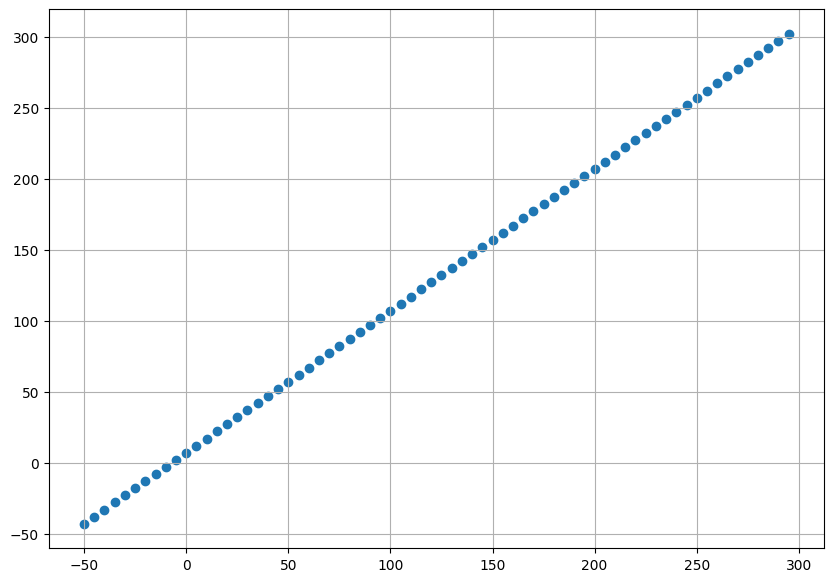

In [37]:
# visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X, y)
plt.grid()

In [38]:
import tensorflow as tf

# train and test split
train_X = X[:-15]
test_X = X[-15:]
train_y = y[:-15]
test_y = y[-15:]
len(train_X), len(test_X), len(train_y), len(test_y), train_X.ndim,
expanded_train_X = tf.expand_dims(train_X, axis=1)
expanded_train_X.ndim
expanded_train_X

<tf.Tensor: shape=(55, 1), dtype=int64, numpy=
array([[-50],
       [-45],
       [-40],
       [-35],
       [-30],
       [-25],
       [-20],
       [-15],
       [-10],
       [ -5],
       [  0],
       [  5],
       [ 10],
       [ 15],
       [ 20],
       [ 25],
       [ 30],
       [ 35],
       [ 40],
       [ 45],
       [ 50],
       [ 55],
       [ 60],
       [ 65],
       [ 70],
       [ 75],
       [ 80],
       [ 85],
       [ 90],
       [ 95],
       [100],
       [105],
       [110],
       [115],
       [120],
       [125],
       [130],
       [135],
       [140],
       [145],
       [150],
       [155],
       [160],
       [165],
       [170],
       [175],
       [180],
       [185],
       [190],
       [195],
       [200],
       [205],
       [210],
       [215],
       [220]])>

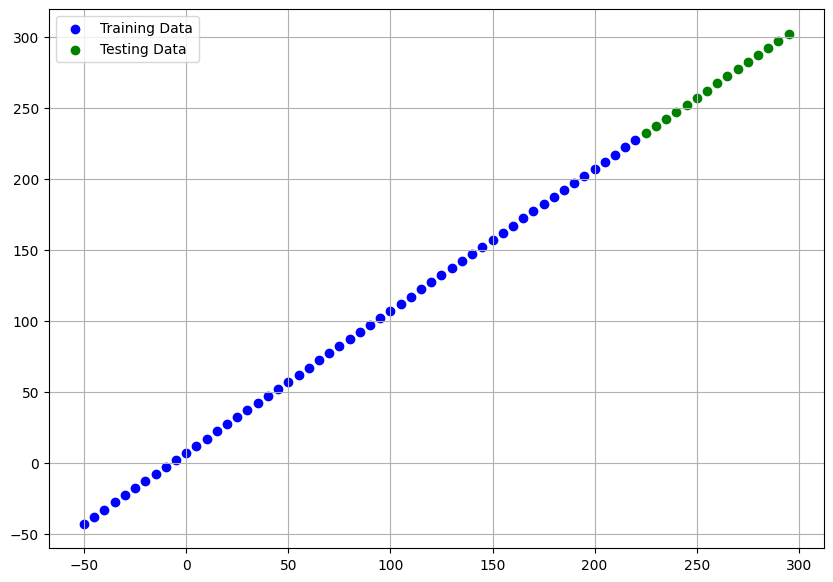

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(train_X, train_y, c='b', label='Training Data')
plt.scatter(test_X, test_y, c='g', label='Testing Data')
plt.grid()
plt.legend()

In [40]:
# Creating the model using Sequential API
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name='model_1')

# Compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
history_1 = model_1.fit(expanded_train_X,
                        train_y,
                        epochs=100,
                        )


Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 108.8799 - mae: 108.8799
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 43.1187 - mae: 43.1187
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 42.1425 - mae: 42.1425
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 43.3421 - mae: 43.3421
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 42.2963 - mae: 42.2963
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 47.2349 - mae: 47.2349
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 41.3246 - mae: 41.3246
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 39.2585 - mae: 39.2585
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 42.6158 - mae: 42.6158
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 45.2473 - mae: 45.2473
Epoch 11/100
2/2 [==============================] - 0

In [41]:
y_preds = model_1.predict(test_X)
y_preds

1/1 [==============================] - 0s 47ms/step


array([[ 86.12374 ],
       [ 88.031044],
       [ 89.938354],
       [ 91.845665],
       [ 93.752975],
       [ 95.66028 ],
       [ 97.56759 ],
       [ 99.4749  ],
       [101.38221 ],
       [103.28951 ],
       [105.19682 ],
       [107.10413 ],
       [109.01144 ],
       [110.91875 ],
       [112.82606 ]], dtype=float32)

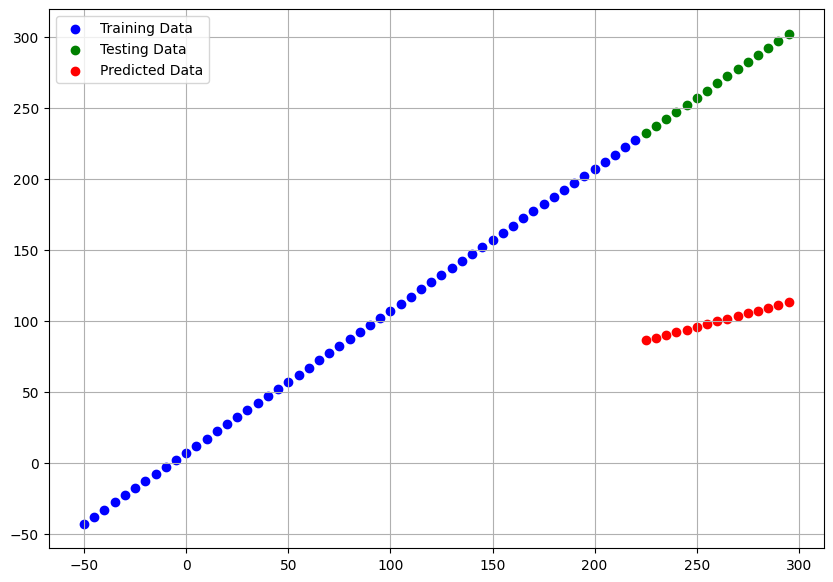

In [42]:
plt.figure(figsize=(10,7))
plt.scatter(train_X, train_y, c='b', label='Training Data')
plt.scatter(test_X, test_y, c='g', label='Testing Data')
plt.scatter(test_X, y_preds, c='r', label='Predicted Data')
plt.grid()
plt.legend()

Text(0.5, 0, 'epochs')

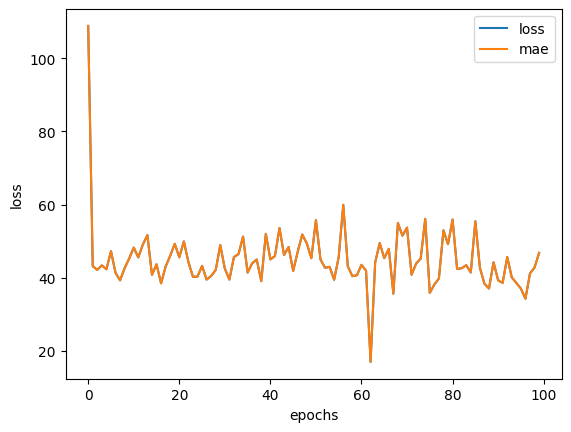

In [43]:
import pandas as pd
pd.DataFrame(history_1.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
---

In [44]:
# Creating model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name='model_2')

# Compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
# Fit
history_2 = model_2.fit(expanded_train_X,
                        train_y,
                        epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 50.1771 - mae: 50.1771
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 36.7549 - mae: 36.7549
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 22.6969 - mae: 22.6969
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8522 - mae: 9.8522
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 8.2711 - mae: 8.2710
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 14.3432 - mae: 14.3432
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9406 - mae: 14.9406
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.4647 - mae: 11.4647
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 6.2141 - mae: 6.2141
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 5.4312 - mae: 5.4312
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

In [45]:
y_preds_2 = model_2.predict(test_y)

1/1 [==============================] - 0s 79ms/step


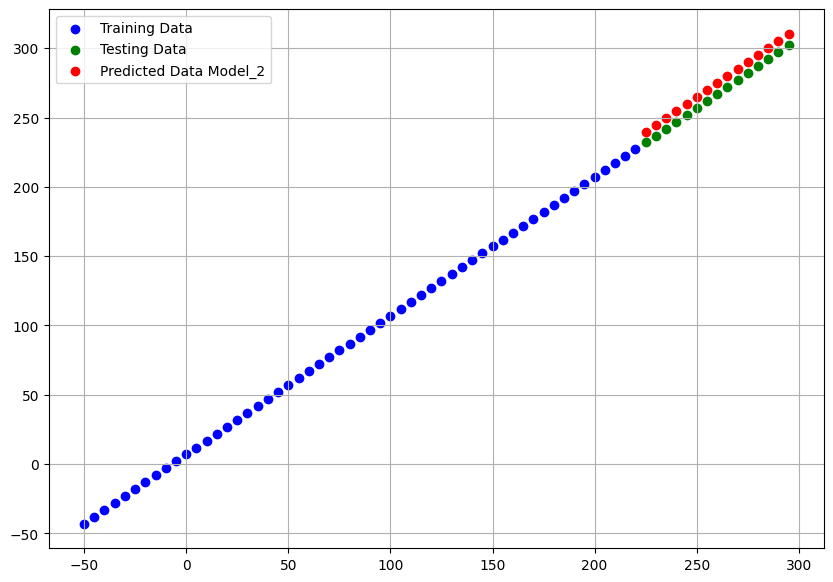

In [46]:
plt.figure(figsize=(10,7))
plt.scatter(train_X, train_y, c='b', label='Training Data')
plt.scatter(test_X, test_y, c='g', label='Testing Data')
plt.scatter(test_X, y_preds_2, c='r', label='Predicted Data Model_2')
plt.grid()
plt.legend()

Text(0.5, 0, 'epochs')

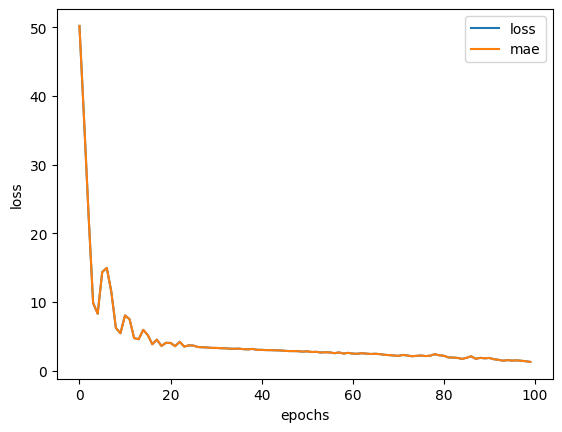

In [47]:
import pandas as pd
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

3. Try and improve the results we got on the insurance dataset.
---

In [48]:
# Get and read the data
import pandas as pd
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [49]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
# Doing one_hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head(5)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [51]:
# Getting labels
X = insurance_one_hot.drop('charges', axis=1)
X.head(5)


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [52]:
y = insurance_one_hot['charges']
y.head(5)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [53]:
len(X), len(y)

(1338, 1338)

In [54]:
# train, test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [55]:
# Model Create
tf.random.set_seed(42)

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model
insurance_history_1 = insurance_model_1.fit(X_train,
                                            y_train,
                                            epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13287.8662 - mae: 13287.8662
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13117.0029 - mae: 13117.0029
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12766.9160 - mae: 12766.9160
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12086.8369 - mae: 12086.8369
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10953.8506 - mae: 10953.8506
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9508.5537 - mae: 9508.5537
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8177.6689 - mae: 8177.6689
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7534.9019 - mae: 7534.9019
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7427.2222 - mae: 7427.2222
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7406.3887 - mae:

In [56]:
insurance_model_1_evaluation = insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4849.5254 - mae: 4849.5254


Text(0, 0.5, 'loss')

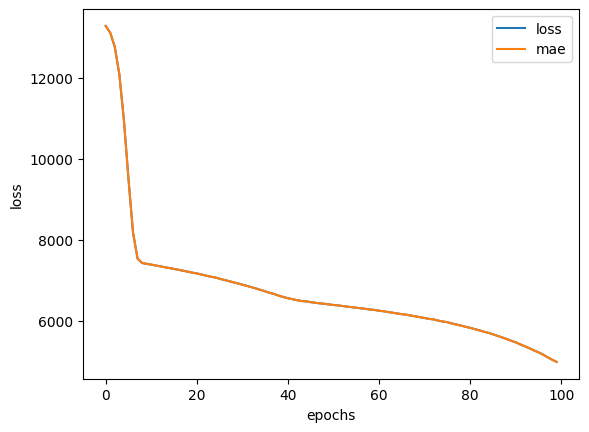

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(insurance_history_1.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')


In [58]:
X_train.shape

(1070, 11)

In [59]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
# Normalization
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Craete column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'children', 'bmi']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Creating X and y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Split X, y
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Normalize data
normalized_X_train = ct.transform(X_train)
normalized_X_test = ct.transform(X_test)


In [61]:
normalized_X_train[0]

array([0.60869565, 0.4       , 0.10734463, 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [62]:
# Create a model as same as insurance model 1.
tf.random.set_seed(42)
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model
insurance_history_2 = insurance_model_2.fit(normalized_X_train,
                                            y_train,
                                            epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.3994 - mae: 13343.3994
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.0234 - mae: 13333.0234
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13308.0156 - mae: 13308.0156
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13257.7393 - mae: 13257.7393
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13171.4502 - mae: 13171.4502
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13038.2314 - mae: 13038.2314
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12847.6152 - mae: 12847.6152
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12589.3652 - mae: 12589.3652
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12253.4102 - mae: 12253.4102
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11837.87

In [63]:
model_2_evaluation = insurance_model_2.evaluate(normalized_X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3436.6455 - mae: 3436.6455


Text(0, 0.5, 'loss')

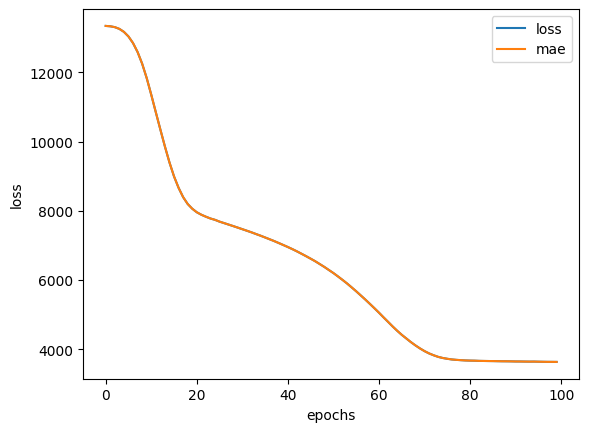

In [64]:
pd.DataFrame(insurance_history_2.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

Epochs 200 and using lr callback.

In [66]:
# set seed and create model

tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name='insurance_model_3')

# Compile
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Model Fit
insurance_history_3 = insurance_model_3.fit(normalized_X_train,
                                            y_train,
                                            epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 2ms/step - loss: 13344.0801 - mae: 13344.0801
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13336.2080 - mae: 13336.2080
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13316.3164 - mae: 13316.3164
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.9561 - mae: 13273.9561
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13197.8496 - mae: 13197.8496
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13076.5752 - mae: 13076.5752
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12899.5869 - mae: 12899.5869
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12656.7656 - mae: 12656.7656
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12337.9590 - mae: 12337.9590
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11938.44

In [67]:
model_3_evaluation = insurance_model_3.evaluate(normalized_X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3170.2664 - mae: 3170.2664


<Axes: >

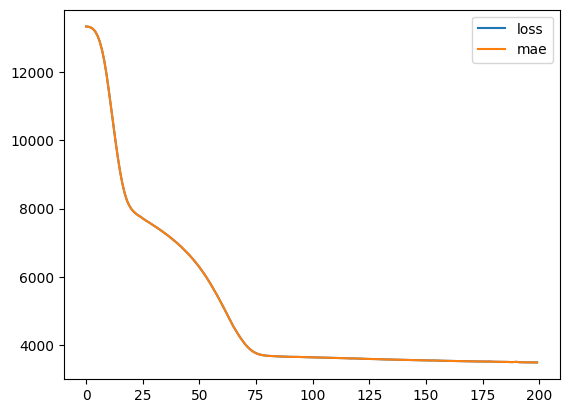

In [69]:
import pandas as pd
pd.DataFrame(insurance_history_3.history).plot()

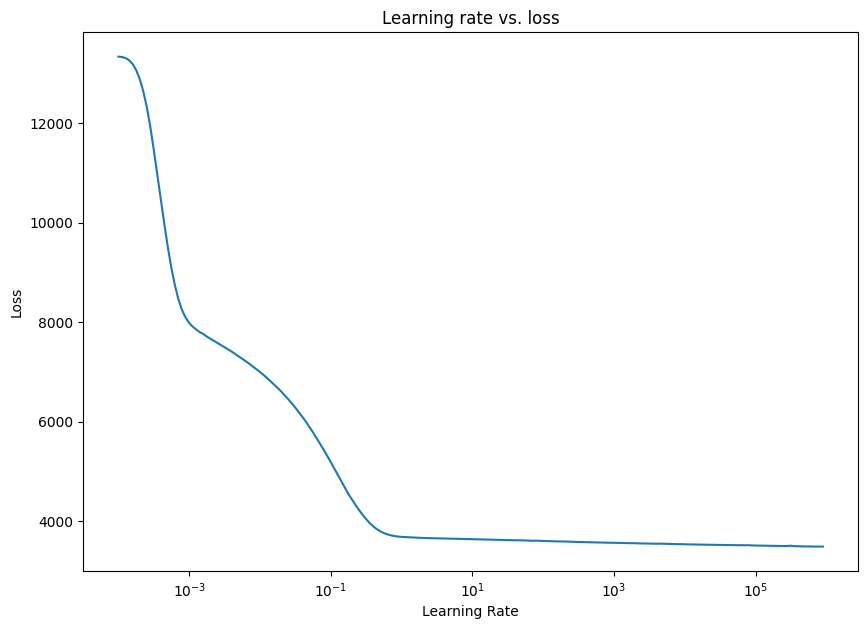

In [72]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(200)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, insurance_history_3.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [91]:
# set seed and create another model
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name='insurance_model_4')

# Compile
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr=0.001),
                          metrics=['mae'])

# fit the model
insurance_history_4 = insurance_model_4.fit(normalized_X_train,
                        y_train,
                        epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 2ms/step - loss: 13344.6846 - mae: 13344.6846
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13338.9980 - mae: 13338.9980
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 13323.4434 - mae: 13323.4434
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 13288.2520 - mae: 13288.2520
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 13222.3232 - mae: 13222.3232
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 13114.3242 - mae: 13114.3242
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 12953.5889 - mae: 12953.5889
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 12729.7373 - mae: 12729.7373
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 12432.3262 - mae: 12432.3262
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 12054.09

<Axes: >

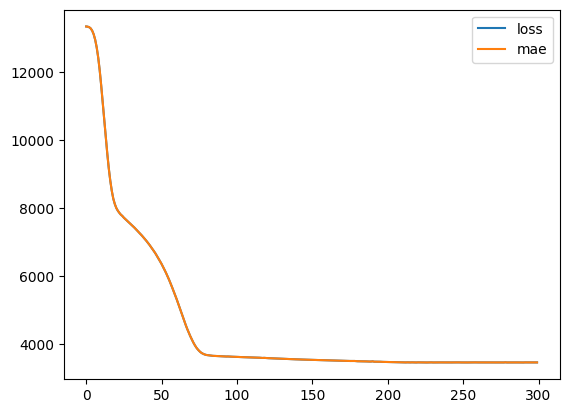

In [92]:
import pandas as pd
pd.DataFrame(insurance_history_4.history).plot()

In [93]:
model_4_evaluation = insurance_model_4.evaluate(normalized_X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.4446 - mae: 3161.4446
